In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
%matplotlib inline

In [8]:
def p(x,mu,sigma):
    return (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x - mu)**2/(2.*sigma**2))

In [9]:
def g(a, c, x):
    return a + c*x
def h(a, c, x):
    return p(x,0.5,1)/(p(x,0.5,1) + p(x,0.5*c+a,c))
    #return p(x,0.5,1)/(p(x,0.5,1) + abs(c)*p(a+c*x,0.5,1))

In [4]:
xx = np.random.normal(0.5,1.,1000)
A = 0
C = 0
range = 1.6
alow = A-range
ahigh = A+range
astep = cstep = 20
clow = C - range
chigh = C + range
alpha = 0

mylosses=[]
for c in np.linspace(clow,chigh,cstep):
    losses=[]
    for a in np.linspace(alow, ahigh, astep):
        yy = g(a, c, xx)
        losses += [np.mean(-np.log(0.000001+h(a, c, xx)) - np.log(0.000001+1.-h(a, c, yy)))]
    mylosses += [losses]
mylosses = mylosses - np.array(mylosses).max()

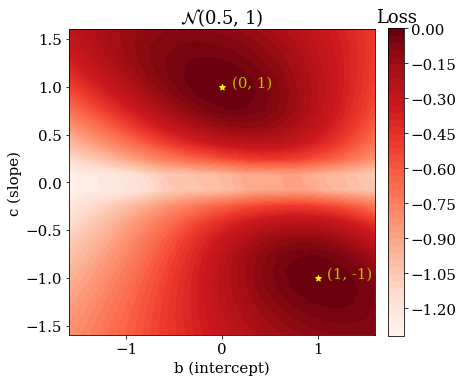

In [5]:
x = np.linspace(alow, ahigh, astep)
y = np.linspace(clow, chigh, cstep)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('b (intercept)')
ax.set_ylabel('c (slope)')
cf = ax.contourf(X,Y,Z,50, cmap='Reds')
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')
plt.scatter([0, 1], [1, -1], marker='*', c='yellow')
ax.annotate('(0, 1)', xy=(0.1, 1), c='y')
ax.annotate('(1, -1)', xy=(1.1, -1), c='y')
plt.title(r"$\mathcal{N}$(0.5, 1)")
#plt.show()
plt.savefig("Z2analytic.pdf",  bbox_inches='tight')

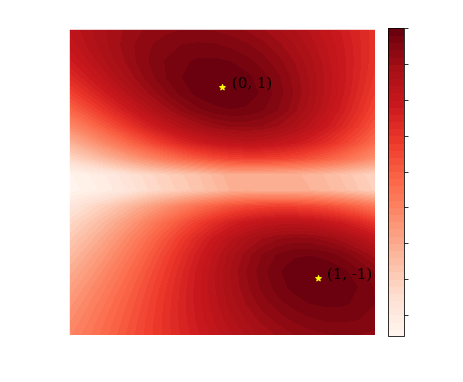

In [11]:
fig, ax = plt.subplots(figsize=(6,6))


ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white') 
ax.spines['bottom'].set_color('white') 

x = np.linspace(alow, ahigh, astep)
y = np.linspace(clow, chigh, cstep)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"




ax.set_aspect('equal')
ax.set_xlabel('b (intercept)')
ax.set_ylabel('c (slope)')
cf = ax.contourf(X,Y,Z,50, cmap='Reds')
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss', c='w')
cbytick_obj = plt.getp(clb.ax.axes, 'yticklabels')                #tricky

plt.setp(cbytick_obj, color='w')
plt.scatter([0, 1], [1, -1], marker='*', c='yellow')
ax.annotate('(0, 1)', xy=(0.1, 1))
ax.annotate('(1, -1)', xy=(1.1, -1))
plt.title(r"$\mathcal{N}$(0.5, 1)", c='w')
plt.savefig("Z2analytic.png",  bbox_inches='tight', transparent=True)
#plt.show()



In [14]:
xx = np.random.normal(0.5,1.,1000)

C = 0
range = 3
cstep = 100
clow = C - range
chigh = C + range
alpha = 0

mylosses=[]
for c in np.linspace(clow,chigh,cstep):
    yy = g(1, c, xx)
    mylosses += [np.mean(-np.log(0.000001+h(1, c, xx)) - np.log(0.000001+1.-h(1, c, yy)))]
mylosses = mylosses - np.array(mylosses).max()

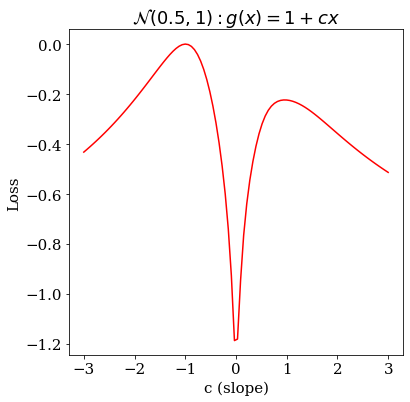

In [20]:
plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"


fig, ax = plt.subplots(figsize=(6,6))

ax.set_ylabel('Loss')
ax.set_xlabel('c (slope)')

plt.plot(np.linspace(clow, chigh, cstep), mylosses, c='r')
plt.title(r"$\mathcal{N}(0.5, 1): g(x) = 1 + cx$")
#plt.show()
plt.savefig("restrictedZ2.pdf",  bbox_inches='tight')